<a href="https://colab.research.google.com/github/palash-21/EDA_hotel_bookings/blob/main/Hotel_Booking_Analysis_04_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [61]:
# Lets equip all the weapons needed..
import pandas as pd
import numpy as np
import missingno as msno
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/almabetter pro materials/Capstone Projects/My Capstone Projects/EDA - Hotel Bookings Analysis/Hotel Bookings.csv')

In [64]:
df.shape

(119390, 32)

In [65]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [66]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,0.0,0,BB,BEL,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,0.0,0,BB,FRA,Online TA,TA/TO,0,0,0,E,E,0,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,0.0,0,BB,DEU,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07
119389,City Hotel,0,205,2017,August,35,29,2,7,2,0.0,0,HB,DEU,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,2017-09-07


# Lets dive-into the data and also check its sanity.

In [67]:
df.describe(include='all')

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
count,119390,119390.000000,119390.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390,118902,119390,119390,119390.000000,119390.000000,119390.000000,119390,119390,119390.000000,119390,103050.000000,6797.000000,119390.000000,119390,119390.000000,119390.000000,119390.000000,119390,119390
unique,2,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,177,8,5,NaN,NaN,NaN,10,12,NaN,3,NaN,NaN,NaN,4,NaN,NaN,NaN,3,926
top,City Hotel,NaN,NaN,NaN,August,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BB,PRT,Online TA,TA/TO,NaN,NaN,NaN,A,A,NaN,No Deposit,NaN,NaN,NaN,Transient,NaN,NaN,NaN,Check-Out,2015-10-21
freq,79330,NaN,NaN,NaN,13877,NaN,NaN,NaN,NaN,NaN,NaN,NaN,92310,48590,56477,97870,NaN,NaN,NaN,85994,74053,NaN,104641,NaN,NaN,NaN,89613,NaN,NaN,NaN,75166,1461
mean,NaN,0.370416,104.011416,2016.156554,NaN,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,NaN,NaN,NaN,NaN,0.031912,0.087118,0.137097,NaN,NaN,0.221124,NaN,86.693382,189.266735,2.321149,NaN,101.831122,0.062518,0.571363,NaN,NaN
std,NaN,0.482918,106.863097,0.707476,NaN,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,NaN,NaN,NaN,NaN,0.175767,0.844336,1.497437,NaN,NaN,0.652306,NaN,110.774548,131.655015,17.594721,NaN,50.535790,0.245291,0.792798,NaN,NaN
min,NaN,0.000000,0.000000,2015.000000,NaN,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,1.000000,6.000000,0.000000,NaN,-6.380000,0.000000,0.000000,NaN,NaN
25%,NaN,0.000000,18.000000,2016.000000,NaN,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,9.000000,62.000000,0.000000,NaN,69.290000,0.000000,0.000000,NaN,NaN
50%,NaN,0.000000,69.000000,2016.000000,NaN,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,14.000000,179.000000,0.000000,NaN,94.575000,0.000000,0.000000,NaN,NaN
75%,NaN,1.000000,160.000000,2017.000000,NaN,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,0.000000,NaN,229.000000,270.000000,0.000000,NaN,126.000000,0.000000,1.000000,NaN,NaN


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [69]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [70]:
df['arrival_date_year'].unique()

array([2015, 2016, 2017])

In [71]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [72]:
df['meal'].value_counts()

BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64

In [73]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups', 'Undefined', 'Aviation'], dtype=object)

In [74]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [75]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [76]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

# Columns info (interpreted):

1. Hotel : Type/Category of Hotel 
 So, we have two types or categories of hotel, namely '**City Hotels**' & '**Resorts**'

2. is_canceled : Has **boolean** values 0 for not cancelled and 1 for cancelled bookings. 

3. lead_time : As limited info is available about it, our best guess is that it gives the difference between booking date and arrival date in no of days unit.

4. arrival_date_year: year of arrival ,type=int, three values: **2015,2016,2017**

5. arrival_date_month: month of arrival: type= object
 Its a **categorical** type of variable with 12 unique values 

6. arrival_date_week_number: week_number for the year, type=int , range:** 1 to 53**

7. arrival_date_days_of_the_month: day of the month for arrival, type= int, range: **1 to 31**

8. stays_in_weekend_night :  stays in no of weekend nights, type =int

9. stays_in_week_night :  stays in no of nights in weekdays, type =int

10. adults : no of adults for the stay, type=int
  we have one or more **zero value for adult**, lets check it later

11. children : no. of childrens for the stay, type=float,
 type must be **converted into int**
 we have four null values, we dont know if null corresponds to zero children or not, so we can either drop these 4 rows or we can replace null values with something.

12. babies : no. of babies for the stay, type = int

13. meal : categorical variable, type of meal opted for the stay
  It has 5 types of meal:-  BB: Breakfast & bed, HB: half-board,Breakfast and dinner, FB: full-board, breakfast, lunch & dinner, SC: self-catering, no meals
and we also have Undefined: which probably states that none of this was opted by costumer while booking.

14. country : location as in country , name of country is stored as commonly recognized **3-letter country codes**.It has 177 countries.
There are some null values

15. market_segment: market segment categories

16. distribution_channel :** five **distrubation channels based on booking

17. is_repeated_guest : **boolean** variable , o for non-repeated and 1 for repeated guest.

18. previous_cancellations : no of previous cancellations , type=int

19. previous_bookings_not_canceled : no of previous non-cancelled bookings, type=int

20. reserved_room_type : type of room as per booking

21. assigned_room_type : type of room actually assigned

22. booking_changes : no of changes done in booking by customer, type=int

23. deposit_type : three categories :- **refundable, non-refundable, no deposit**

24. agent : agent throught which booking was made, type = float, value most likely corresponds to id of agent. Has some null values, these value either indicate that booking was not done via any agent or that data was unavailable

25. company :company throught which booking was made, type = float, value most likely corresponds to id of company. Has some null values, these value either indicate that booking was not done via any company or that data was unavailable

26. days_in_waiting_list : no of days hotel management took to confirm booking

27. customer_type : four types of customers

28. adr : **average daily rate** for the hotel.

29. required_car_parking_spaces: no of car parking spaces required by customer

30. total_of_special_request : total no of special requests 

31. reservation_status : **three** status, namely check-out, cancelled, no-show

32. reservation_status_date : date on which reservation status was updated 

# Checking for null values

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# This looks great as we dont have much null values, except for 4 out of 32 columns.


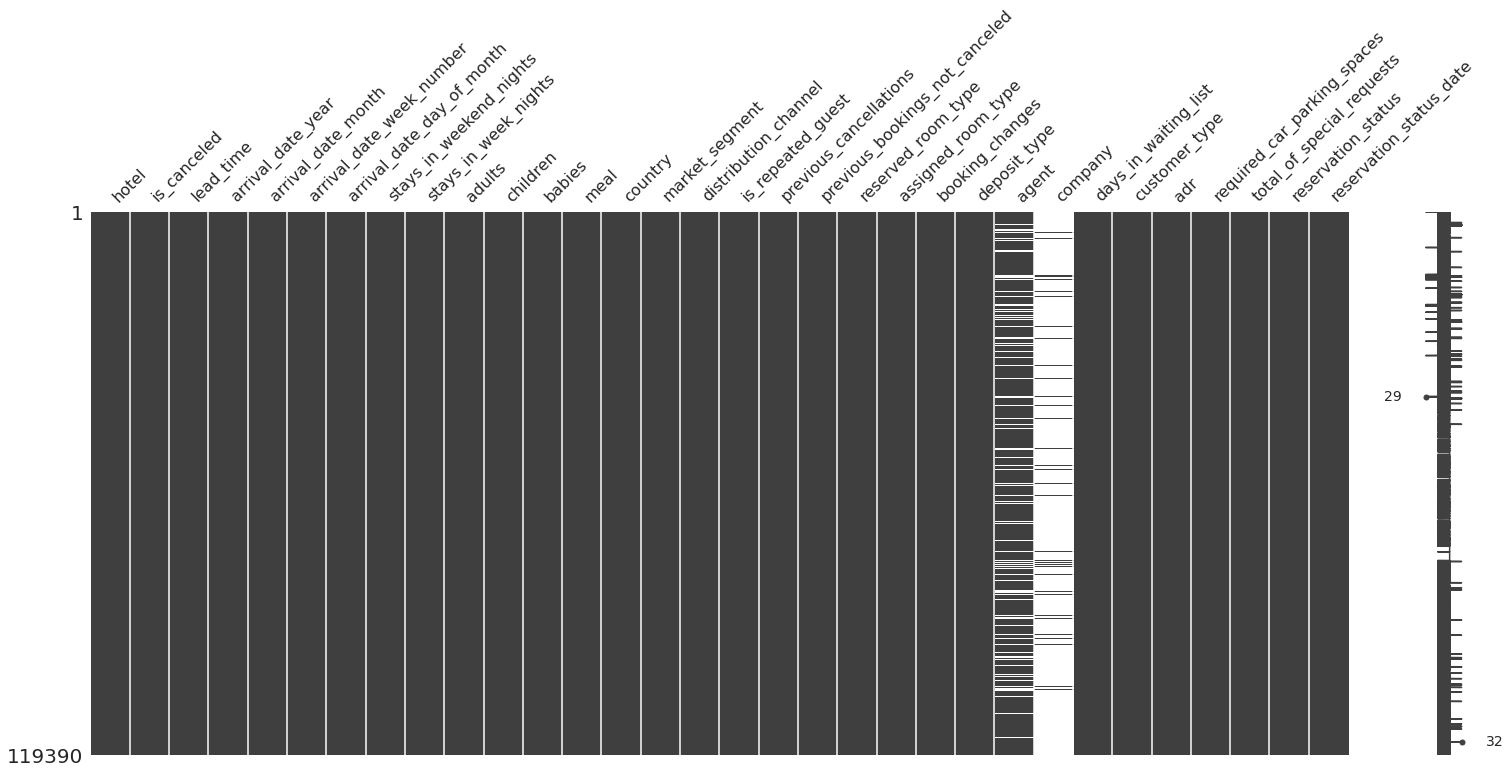

In [78]:
msno.matrix(df)

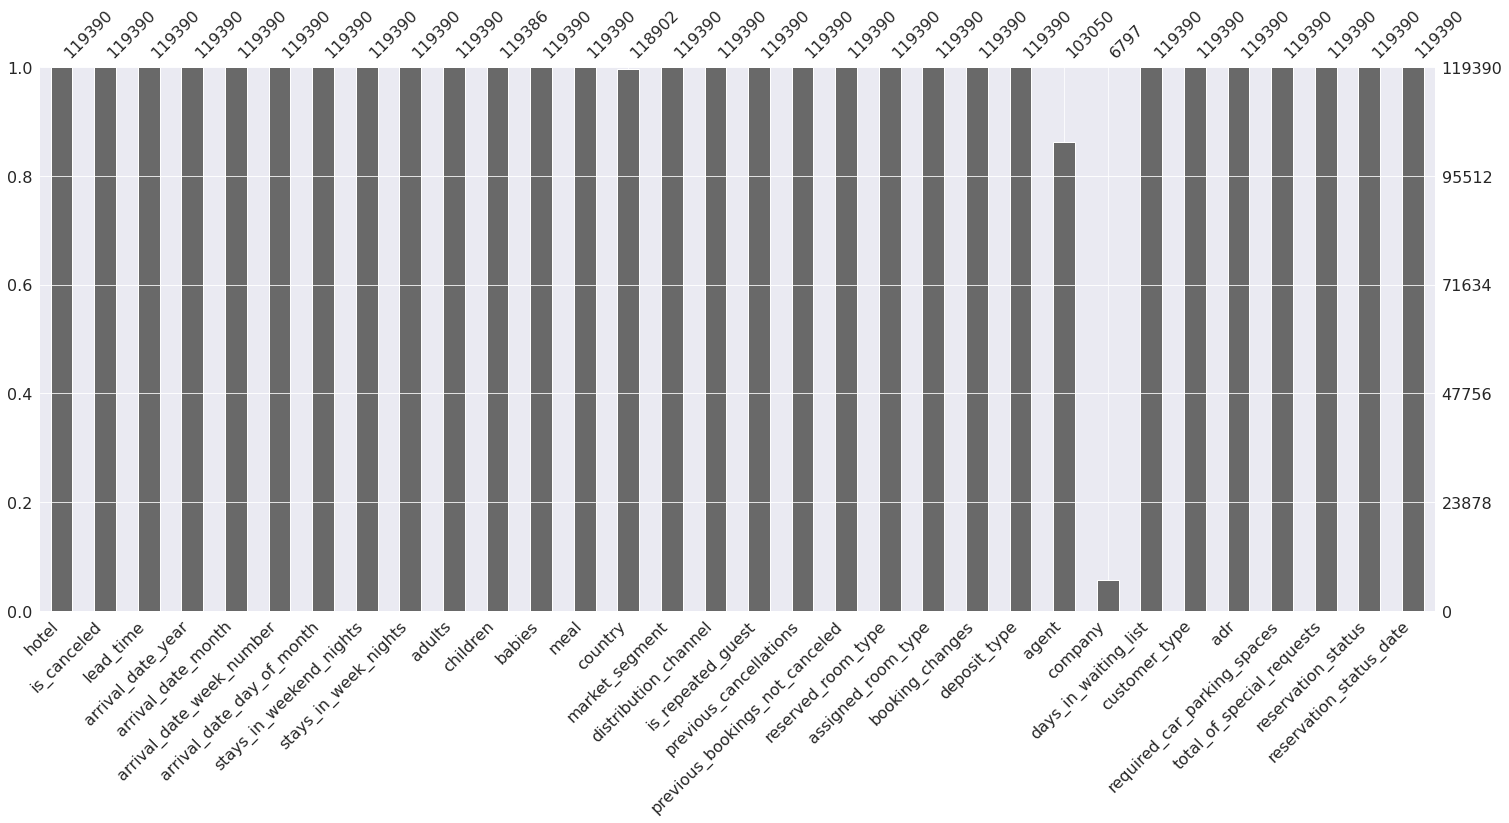

In [79]:
msno.bar(df)

In [80]:
#Check how many cells are missing from our dataset

df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [81]:
#We can see that we have 4 columns with missing values
#Lets check these values as percentages.

df.isnull().sum()/len(df.index)*100

hotel                              0.000000
is_canceled                        0.000000
lead_time                          0.000000
arrival_date_year                  0.000000
arrival_date_month                 0.000000
arrival_date_week_number           0.000000
arrival_date_day_of_month          0.000000
stays_in_weekend_nights            0.000000
stays_in_week_nights               0.000000
adults                             0.000000
children                           0.003350
babies                             0.000000
meal                               0.000000
country                            0.408744
market_segment                     0.000000
distribution_channel               0.000000
is_repeated_guest                  0.000000
previous_cancellations             0.000000
previous_bookings_not_canceled     0.000000
reserved_room_type                 0.000000
assigned_room_type                 0.000000
booking_changes                    0.000000
deposit_type                    

In [82]:
#Checking the children column
df[df['children'].isna()]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
40600,City Hotel,1,2,2015,August,32,3,1,0,2,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-01
40667,City Hotel,1,1,2015,August,32,5,0,2,2,NaN,0,BB,PRT,Direct,Undefined,0,0,0,B,B,0,No Deposit,14.0,NaN,0,Transient-Party,12.0,0,1,Canceled,2015-08-04
40679,City Hotel,1,1,2015,August,32,5,0,2,3,NaN,0,BB,PRT,Undefined,Undefined,0,0,0,B,B,0,No Deposit,NaN,NaN,0,Transient-Party,18.0,0,2,Canceled,2015-08-04
41160,City Hotel,1,8,2015,August,33,13,2,5,2,NaN,0,BB,PRT,Online TA,Undefined,0,0,0,B,B,0,No Deposit,9.0,NaN,0,Transient-Party,76.5,0,1,Canceled,2015-08-09


In [83]:
df['children'].value_counts()

0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

In [84]:
# So we have 4 rows with null values for childrens. So , we can either remove these 4 rows or we can replace values with mean/mode of the children column.
# Looking at the data , the mode is 0, so we will replace null values with mode.This make more sense here because counts of 0 (i.e. mode) is very high compared to other values
mode_children = df['children'].mode()[0]
mode_children

0.0

In [85]:
df.loc[df['children'].isna(),'children'] = mode_children

In [86]:
df['children'].value_counts()

0.0     110800
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: children, dtype: int64

# We can see here the the dtype of chidren column is float, so lets convert it to int

In [87]:
df['children'] = df['children'].astype('int64')

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

# When we look at adr (average daily rate) data, the minimum value is negative, which doesnt make sense

In [89]:
df[df['adr']<0]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
14969,Resort Hotel,0,195,2017,March,10,5,4,6,2,0,0,BB,GBR,Groups,Direct,1,0,2,A,H,2,No Deposit,273.0,NaN,0,Transient-Party,-6.38,0,0,Check-Out,2017-03-15


# So we will assume this as a typing error and chnage it to positive

In [90]:
df.loc[df['adr']<0,'adr'] = - df.loc[df['adr']<0,'adr']

In [91]:
df.loc[14969,'adr']

6.38

# Columns agent and company also have float dtype but all values are in integers.
Also, these columns corresponds to id of agents and companies used by customer for bookings. 
Both of these columns have high percentage of missing values and as these columns are not much of use, we can  drop these columns

In [92]:
df.drop(['agent','company'],axis=1,inplace=True) 

# The column adult as well as children have min value zero, so lets check it 

In [93]:
df[df['adults']==0][df['children']==0][df['babies']==0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
2224,Resort Hotel,0,1,2015,October,41,6,0,3,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,1,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-10-06
2409,Resort Hotel,0,0,2015,October,42,12,0,0,0,0,0,SC,PRT,Corporate,Corporate,0,0,0,A,I,0,No Deposit,0,Transient,0.00,0,0,Check-Out,2015-10-12
3181,Resort Hotel,0,36,2015,November,47,20,1,2,0,0,0,SC,ESP,Groups,TA/TO,0,0,0,A,C,0,No Deposit,0,Transient-Party,0.00,0,0,Check-Out,2015-11-23
3684,Resort Hotel,0,165,2015,December,53,30,1,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,A,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-04
3708,Resort Hotel,0,165,2015,December,53,30,2,4,0,0,0,SC,PRT,Groups,TA/TO,0,0,0,A,C,1,No Deposit,122,Transient-Party,0.00,0,0,Check-Out,2016-01-05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115029,City Hotel,0,107,2017,June,26,27,0,3,0,0,0,BB,CHE,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient,100.80,0,0,Check-Out,2017-06-30
115091,City Hotel,0,1,2017,June,26,30,0,1,0,0,0,SC,PRT,Complementary,Direct,0,0,0,E,K,0,No Deposit,0,Transient,0.00,1,1,Check-Out,2017-07-01
116251,City Hotel,0,44,2017,July,28,15,1,1,0,0,0,SC,SWE,Online TA,TA/TO,0,0,0,A,K,2,No Deposit,0,Transient,73.80,0,0,Check-Out,2017-07-17
116534,City Hotel,0,2,2017,July,28,15,2,5,0,0,0,SC,RUS,Online TA,TA/TO,0,0,0,A,K,1,No Deposit,0,Transient-Party,22.86,0,1,Check-Out,2017-07-22


# These 180 rows doesnt make any sense as visitors is zero for the stay, so we can either drop these rows right now or we can assume that values are resulted from manual error and ignore for now for analysis which are not related with type or number of visitors. While for such comparison, we will drop these rows. 

# The column country has name of country in 3 letter code, it has 177 unique values and some null values. Its possible that the hotel management doesnt have the data regading visitor's origin country, so these values are acceptable. We can keep these values for now but need to drop for comparing countries against num of visitors

# Looking at the outliers

In [94]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103886,0.007949,0.031912,0.087118,0.137097,0.221124,2.321149,101.831228,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398555,0.097436,0.175767,0.844336,1.497437,0.652306,17.594721,50.535575,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

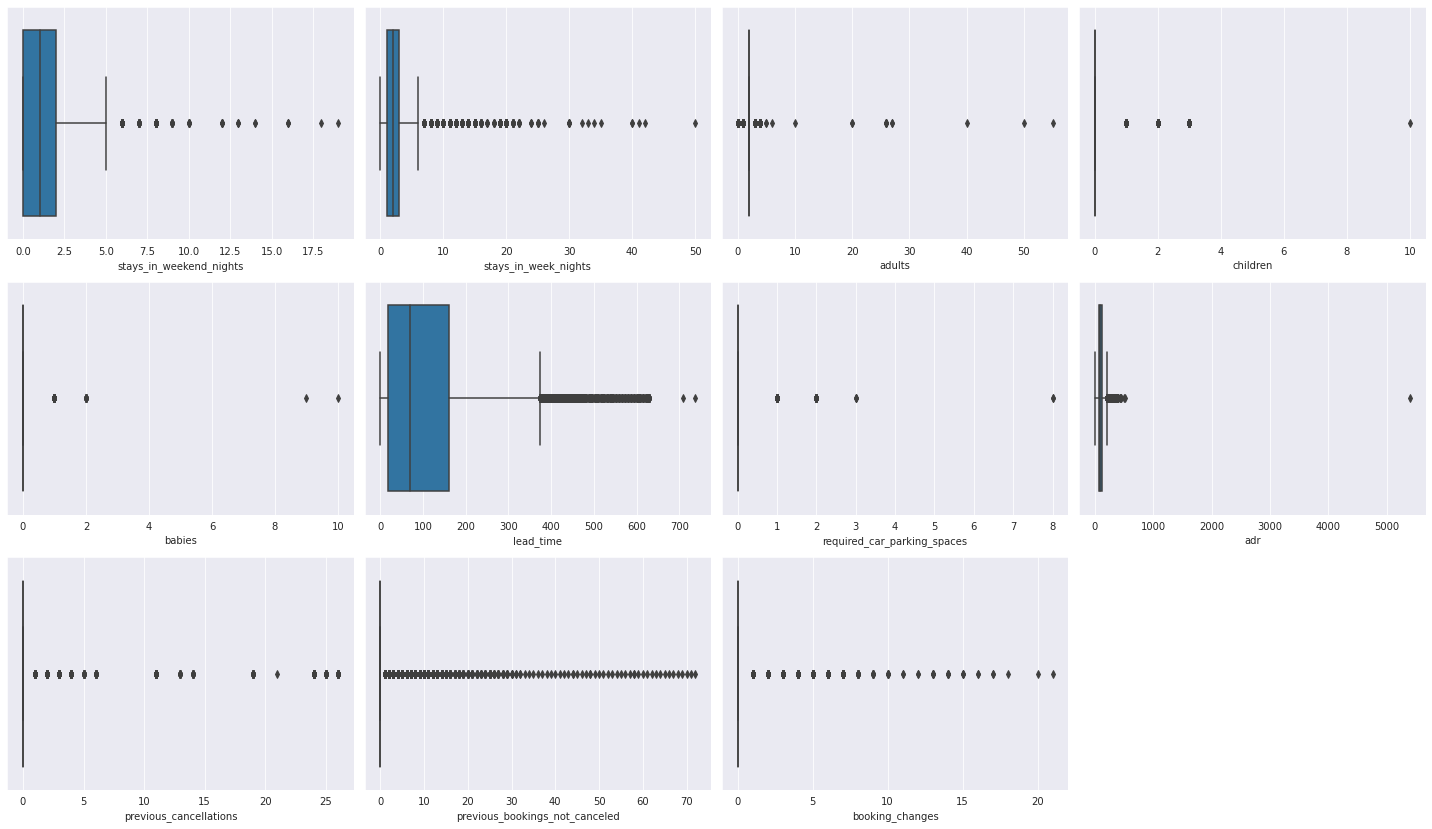

In [95]:
#Here we can see some outliers.
#Lets build boxplots to see it better.

columns = ['stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies','lead_time', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

# Here we have lots of outliers in our data, so we cannot remove them as it would lead to loss of important info.

# Hotel vs Resort 

In [96]:
# As we have two categories of hotel, lets compare them.
hotel_df = pd.DataFrame(df['hotel'].value_counts()).reset_index().rename(columns={'index':'hotel_type','hotel':'bookings'})
hotel_df['perc_bookings']= hotel_df['bookings']*100/hotel_df['bookings'].sum()

In [97]:
hotel_df

,hotel_type,bookings,perc_bookings
0,City Hotel,79330,66.446101
1,Resort Hotel,40060,33.553899


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


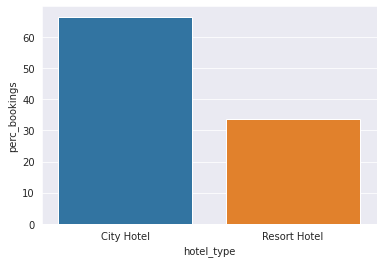

In [98]:
x=hotel_df['hotel_type']
y=hotel_df['perc_bookings']
sns.barplot(x,y)
plt.show()

# So, **`city hotels`** are booked almost twice the no of times that **resort hotels** are booked

# Total cancelled vs non-cancelled booking

In [99]:
cancelled_or_not_df = pd.DataFrame(df['is_canceled'].value_counts()).reset_index().rename(columns={'index':'status','is_canceled':'counts'})
cancelled_or_not_df['status'] = 'not cancelled','cancelled'
cancelled_or_not_df['perc_bookings']= cancelled_or_not_df['counts']*100/cancelled_or_not_df['counts'].sum()
cancelled_or_not_df

,status,counts,perc_bookings
0,not cancelled,75166,62.958372
1,cancelled,44224,37.041628


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


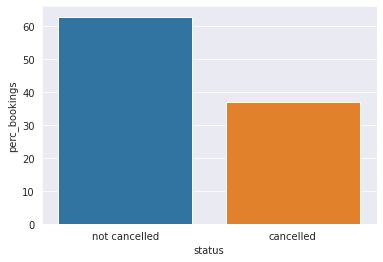

In [100]:
x=cancelled_or_not_df['status']
y=cancelled_or_not_df['perc_bookings']
sns.barplot(x,y)
plt.show()

# We can comment that almost **37%** bookings are **cancelled** by visitors. 

# Cancelled vs non-cancelled booking for hotel and resort

In [101]:
#Lets club both of these graphs together
hotel_cancellation_df = pd.DataFrame()
hotel_cancellation_df['status']=cancelled_or_not_df['status']
hotel_cancellation_df['city_hotel']=df.loc[df['hotel']=='City Hotel','is_canceled'].value_counts()
hotel_cancellation_df['city_hotel']=df.loc[df['hotel']=='City Hotel','is_canceled'].value_counts()
hotel_cancellation_df['perc_city_hotel']= hotel_cancellation_df['city_hotel']*100/hotel_cancellation_df['city_hotel'].sum()
hotel_cancellation_df['resort_hotel']=df.loc[df['hotel']=='Resort Hotel','is_canceled'].value_counts()
hotel_cancellation_df['perc_resort_hotel']= hotel_cancellation_df['resort_hotel']*100/hotel_cancellation_df['resort_hotel'].sum()

In [102]:
hotel_cancellation_df

,status,city_hotel,perc_city_hotel,resort_hotel,perc_resort_hotel
0,not cancelled,46228,58.273037,28938,72.236645
1,cancelled,33102,41.726963,11122,27.763355


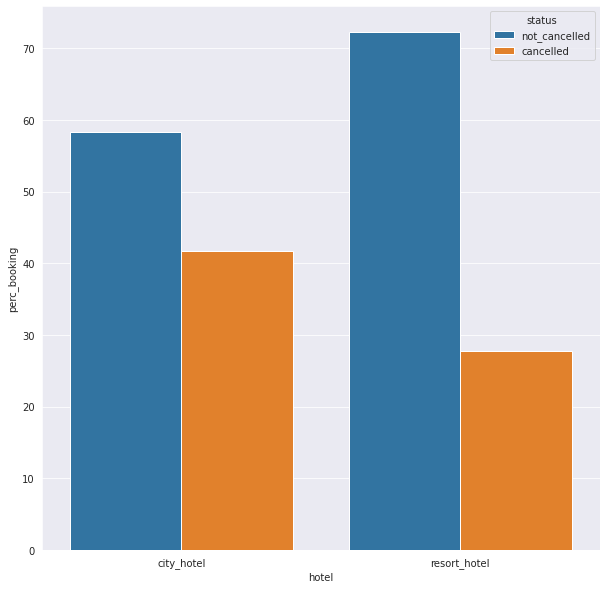

In [103]:
df1=pd.DataFrame({'hotel':['city_hotel','resort_hotel'],'perc_booking':[58.27,72.24]})
df2=pd.DataFrame({'hotel':['city_hotel','resort_hotel'],'perc_booking':[41.72,27.76]})
df1['status']='not_cancelled'
df2['status']='cancelled'
res=pd.concat([df1,df2])
plt.figure(figsize=(10,10))
sns.barplot(x='hotel',y='perc_booking',data=res,hue='status')
plt.show()

# We can comment from above results that almost 40% of city hotel are cancelled while for resort hotels , less than 30% are cancelled.. So, **`city hotels`** are cancelled more often than **`resort hotels`**

In [104]:
# Now, lets use only the non-cancelled bookings for further study as there is no meaning in using the cancelled bookings for some type of comparisons
df_not_cancelled = df[df['is_canceled']==0]

In [105]:
df_not_cancelled.shape

(75166, 30)

# Year wise total bookings and also hotel,resort vise grouping

In [106]:
year_wise_df=df_not_cancelled.groupby(['arrival_date_year'])['hotel'].count().reset_index()
year_wise_df

,arrival_date_year,hotel
0,2015,13854
1,2016,36370
2,2017,24942


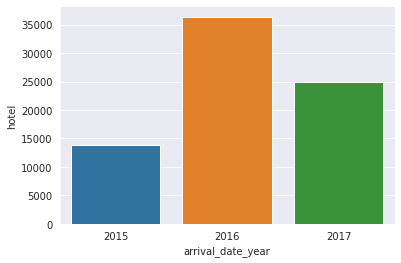

In [107]:
x=year_wise_df['arrival_date_year']
y=year_wise_df['hotel']
sns.barplot(x=x,y=y)
plt.show()

# So the checkins seems to have almost doubled in the year 2016 as compared to prevous year but in 2017 it decreased considerably. Lets check further why this happened . 

In [108]:
# Checking the bookings yearwise.
new_year_wise_df=df_not_cancelled.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().reset_index()


def GetMonthNum(month_name):
  datetime_object = datetime.datetime.strptime(month_name, "%B")
  month_number = datetime_object.month
  return month_number


new_year_wise_df['month_number']=new_year_wise_df['arrival_date_month'].apply(GetMonthNum)
new_year_wise_df['month_year'] = new_year_wise_df['arrival_date_month'] + ' ' + new_year_wise_df['arrival_date_year'].astype(str)
new_year_wise_df.sort_values(by=['arrival_date_year','month_number'],ascending=True,inplace=True)
new_year_wise_df




,arrival_date_year,arrival_date_month,hotel,month_number,month_year
2,2015,July,1517,7,July 2015
0,2015,August,2291,8,August 2015
5,2015,September,3020,9,September 2015
4,2015,October,3225,10,October 2015
3,2015,November,1854,11,November 2015
1,2015,December,1947,12,December 2015
10,2016,January,1691,1,January 2016
9,2016,February,2554,2,February 2016
13,2016,March,3347,3,March 2016
6,2016,April,3367,4,April 2016


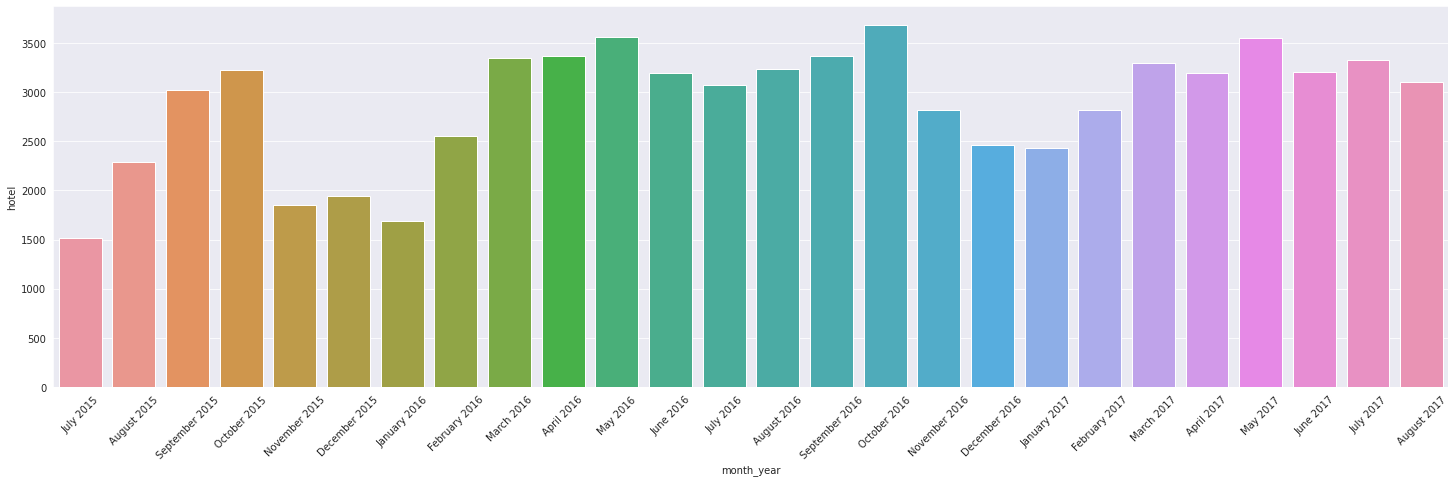

In [109]:
x=new_year_wise_df['month_year']
y=new_year_wise_df['hotel']
plt.figure(figsize=(25,7))
sns.barplot(x=x,y=y)
plt.xticks(rotation=45)
plt.show()

In [110]:
# So we can see that the succesfull bookings have increased year to year but the growth from 2015 to 2016 is relatively large as compared to that from 2016 to 2017.
# Lets check take the monthly average to normalise the data little bit. Idealy we should normalise data on weekly basis as the number of weeks are diff for all months,
# but its fairly okay to do so on monthly average.
# First we will normalise yearly and check the trend of prices.

norm_year_df = new_year_wise_df.groupby(by='arrival_date_year')['hotel'].mean().reset_index()
norm_year_df


,arrival_date_year,hotel
0,2015,2309.000000
1,2016,3030.833333
2,2017,3117.750000


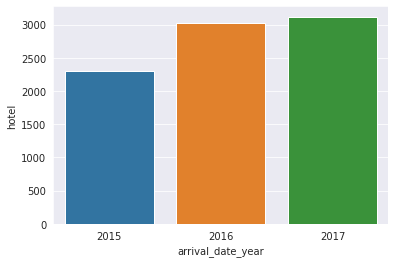

In [111]:
x=norm_year_df['arrival_date_year']
y=norm_year_df['hotel']
sns.barplot(x=x,y=y)
plt.show()

# Lets find the bussiest months

In [112]:
# Dropping the zero adr entries
df_non_zero_adr = df_not_cancelled[df_not_cancelled['adr']>0]

In [113]:
# Taking count of bookings monthwise
month_wise_df=df_non_zero_adr.groupby(['arrival_date_year','arrival_date_month'])['hotel'].count().reset_index()

month_wise_df['month_number']=month_wise_df['arrival_date_month'].apply(GetMonthNum)
month_wise_df['month_year'] = month_wise_df['arrival_date_month'] + ' ' + month_wise_df['arrival_date_year'].astype(str)
month_wise_df.sort_values(by=['arrival_date_year','month_number'],ascending=True,inplace=True)
month_wise_df

,arrival_date_year,arrival_date_month,hotel,month_number,month_year
2,2015,July,1460,7,July 2015
0,2015,August,2200,8,August 2015
5,2015,September,2935,9,September 2015
4,2015,October,3119,10,October 2015
3,2015,November,1793,11,November 2015
1,2015,December,1830,12,December 2015
10,2016,January,1633,1,January 2016
9,2016,February,2494,2,February 2016
13,2016,March,3272,3,March 2016
6,2016,April,3294,4,April 2016


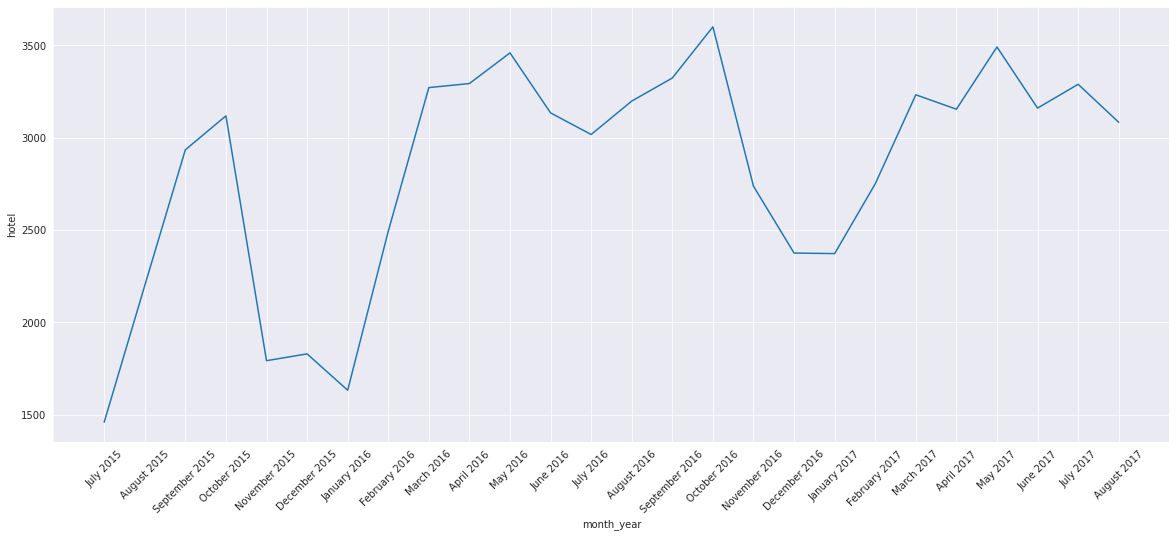

In [114]:
x=month_wise_df['month_year']
y=month_wise_df['hotel']
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.lineplot(x=x,y=y)
plt.xticks(rotation=45)
plt.show()

#So, the bussiest months are from **Mar** to **June** i.e summer season is the **peak season**
#Also, there is spike in number of visitors in the month of october when the weather is quite pleasant.
#While, the number of visitors decreases at **year ending** i.e. in the winter season and also monsoon season experiences less visitors.

# Lets group the ADR of various hotels month-wise by taking average ADR for each month

In [115]:
# Grouping monthly
# Using the non-zero adr df
month_wise_adr_df=df_non_zero_adr.groupby(['arrival_date_year','arrival_date_month'])['adr'].mean().reset_index()

month_wise_adr_df['month_number']=month_wise_adr_df['arrival_date_month'].apply(GetMonthNum)
month_wise_adr_df['month_year'] = month_wise_adr_df['arrival_date_month'] + ' ' + month_wise_adr_df['arrival_date_year'].astype(str)
month_wise_adr_df.sort_values(by=['arrival_date_year','month_number'],ascending=True,inplace=True)
month_wise_adr_df

,arrival_date_year,arrival_date_month,adr,month_number,month_year
2,2015,July,113.878192,7,July 2015
0,2015,August,119.017718,8,August 2015
5,2015,September,101.175325,9,September 2015
4,2015,October,82.187400,10,October 2015
3,2015,November,60.748589,11,November 2015
1,2015,December,75.809268,12,December 2015
10,2016,January,63.946289,1,January 2016
9,2016,February,70.442558,2,February 2016
13,2016,March,76.039691,3,March 2016
6,2016,April,88.395222,4,April 2016


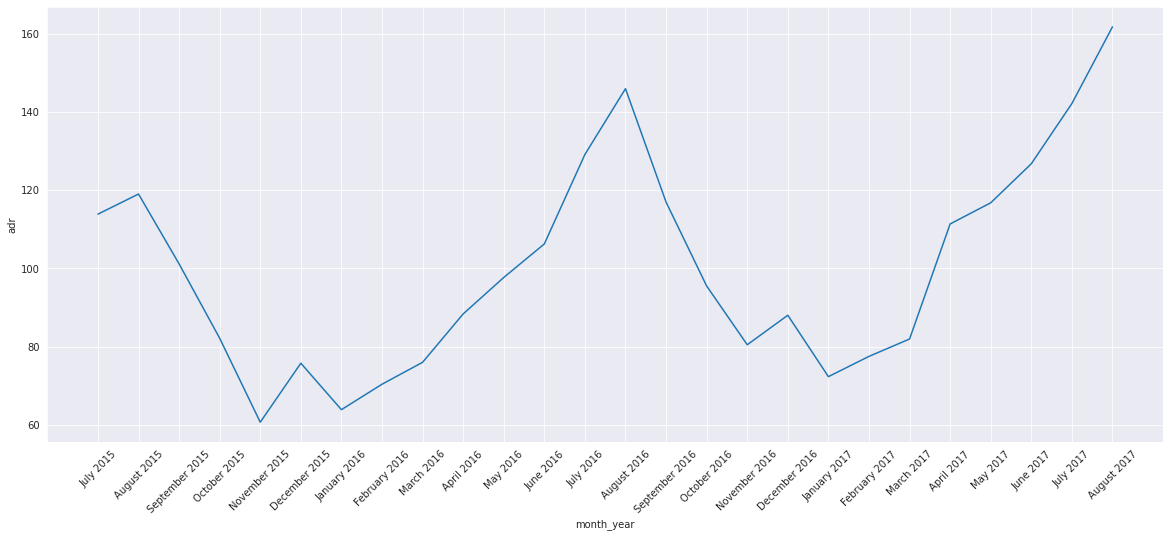

In [116]:
x=month_wise_adr_df['month_year']
y=month_wise_adr_df['adr']
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.lineplot(x=x,y=y)
plt.xticks(rotation=45)
plt.show()

# As we can see from the trend that the prices are **increasing** with time as expected
# Average rates are **high** during **July-August** months while they are lowest in **Dec-jan**  which is the **off** season.

# Lets check when hotels are receiving lots of Special requests

In [117]:
# Grouping monthly
month_request_df=df_not_cancelled.groupby(['arrival_date_year','arrival_date_month'])['total_of_special_requests'].mean().reset_index()

month_request_df['month_number']=month_request_df['arrival_date_month'].apply(GetMonthNum)
month_request_df['month_year'] = month_request_df['arrival_date_month'] + ' ' + month_request_df['arrival_date_year'].astype(str)
month_request_df.sort_values(by=['arrival_date_year','month_number'],ascending=True,inplace=True)
month_request_df

,arrival_date_year,arrival_date_month,total_of_special_requests,month_number,month_year
2,2015,July,0.570204,7,July 2015
0,2015,August,0.760803,8,August 2015
5,2015,September,0.499669,9,September 2015
4,2015,October,0.500775,10,October 2015
3,2015,November,0.408306,11,November 2015
1,2015,December,0.543914,12,December 2015
10,2016,January,0.496156,1,January 2016
9,2016,February,0.538371,2,February 2016
13,2016,March,0.510009,3,March 2016
6,2016,April,0.566083,4,April 2016


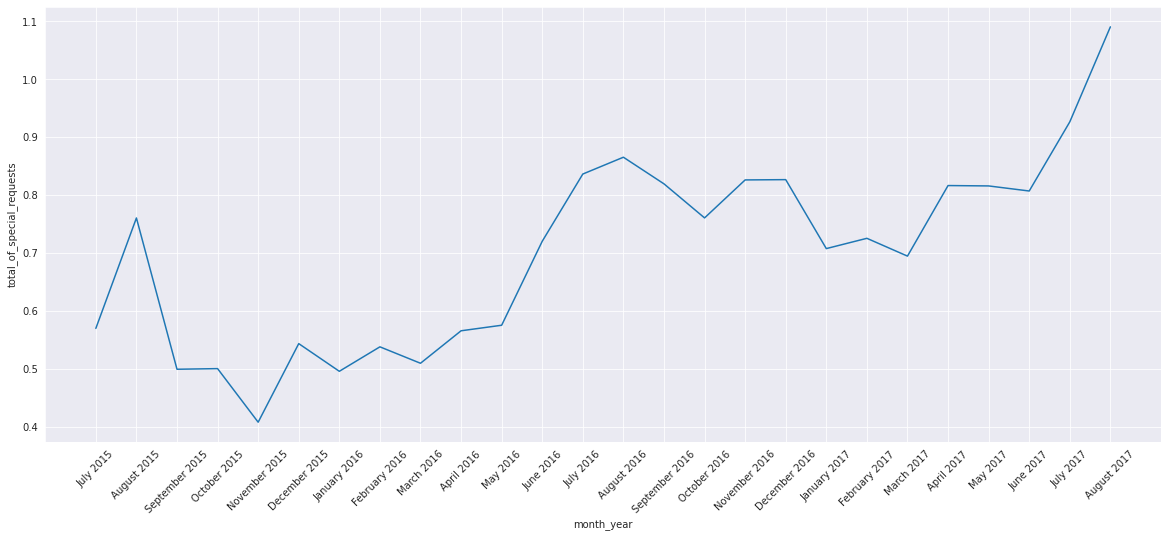

In [118]:
x=month_request_df['month_year']
y=month_request_df['total_of_special_requests']
plt.figure(figsize=(20,8))
sns.set_style("darkgrid")
sns.lineplot(x=x,y=y)
plt.xticks(rotation=45)
plt.show()

# As evident from the graph, we se that the average monthly special requests are increasing with time are highest in **July-August** 
# Also as expected requests are lowest in off season i.e Dec-Jan. 
# So, the special requests and rates are both showing similar seasons.

# Lets also check how many requests are normaly recieved from each visitors

In [119]:
requests_df=df_not_cancelled.groupby(['total_of_special_requests'])['hotel'].count().reset_index()
requests_df['perc_bookings']= requests_df['hotel']*100/requests_df['hotel'].sum()
requests_df

,total_of_special_requests,hotel,perc_bookings
0,0,36762,48.907751
1,1,25908,34.467711
2,2,10103,13.440917
3,3,2051,2.728627
4,4,304,0.404438
5,5,38,0.050555


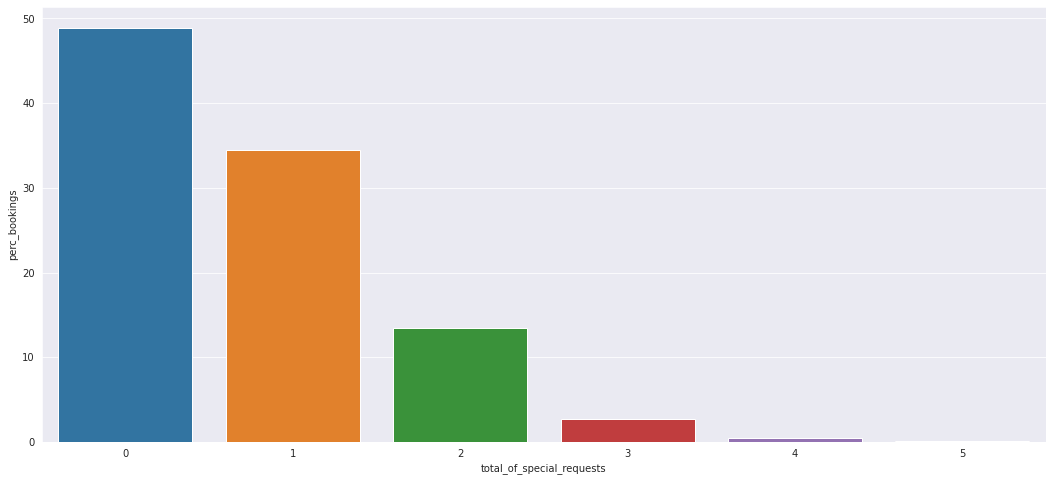

In [120]:
x=requests_df['total_of_special_requests']
y=requests_df['perc_bookings']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# So, more than half of visitors have atleast 1 special request

# Lets find maximum visitors are from which countries.
Removing the null values for country

In [121]:
df_country = df_not_cancelled[~df_not_cancelled['country'].isna()]

In [122]:
df_country.shape

(74745, 30)

In [123]:
# Grouping by country
country_grouped_df= df_country.groupby(by='country')['hotel'].count().reset_index()
country_grouped_df.sort_values(by='hotel',ascending=False,inplace=True)
country_grouped_df

,country,hotel
125,PRT,21071
57,GBR,9676
54,FRA,8481
50,ESP,6391
42,DEU,6069
...,...,...
138,SMR,1
101,MLI,1
136,SLE,1
94,MAC,1


In [124]:
# As the num of countries are 177, which is quite large to plot in graph , we will check the top 10 countries
top_ten_countries=country_grouped_df.head(10)

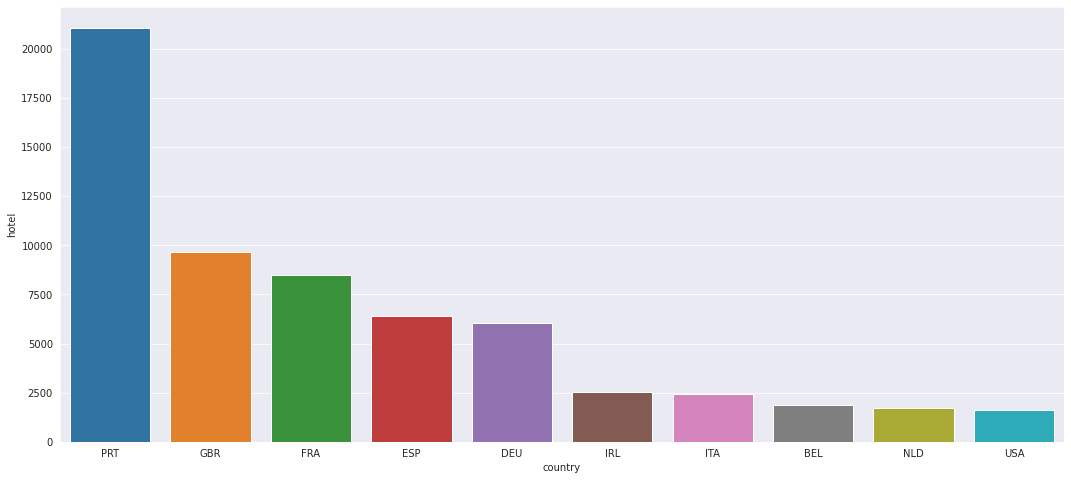

In [125]:
x=top_ten_countries['country']
y=top_ten_countries['hotel']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# The top three countries in order are **Portugal(PRT)** ,  **United Kingdom(GRT)** and **France(FRA)**

# Lets check the range of rates of hotels

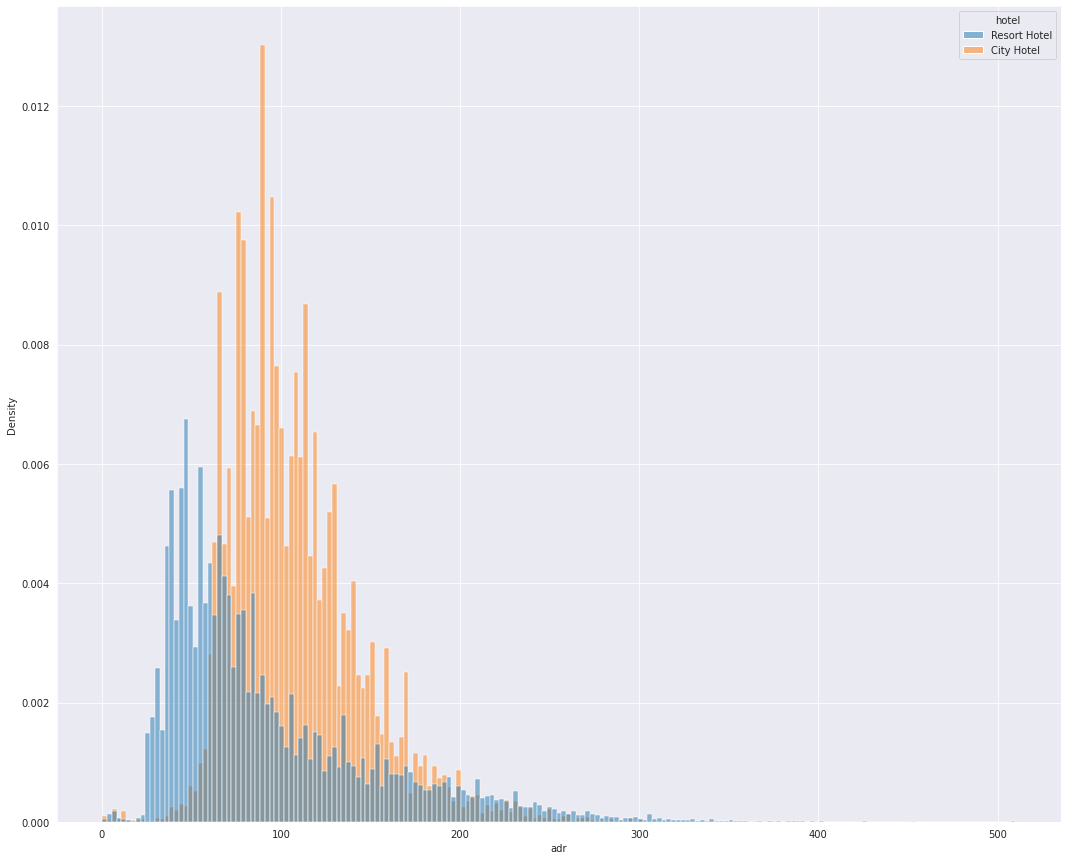

In [126]:
# Using the non-zero adr entries only
plt.figure(figsize=(18,15))
sns.histplot(data=df_non_zero_adr,x='adr',hue='hotel',stat='density')

# The above histogram shows the distribution of rates for city hotels and resort hotels. 
#It is evident that there are more bookings for resort in lower price range as compared to city hotels.
# In medium to high price range, city hotels have more bookings.
# For higher prices, again resort hotels are booked more than city hotels

# Lets compare the type of visitors

Dividing into three categories:Solo,Couple,Family/Friends

For two adult visitors without children/babies , we will treat them as a couple

For more than 2 visitors, it can be family or group of friends or relatives

In [127]:
#First we will remove the entries for which net visitors are zero. These entries can be result of manual error, or the information about no of visitors may not be available..
df_nonzero_visitors = df_not_cancelled[(df_not_cancelled['adults'] + df_not_cancelled['children'] + df_not_cancelled['babies']) > 0]

In [128]:
df_nonzero_visitors.shape

(75011, 30)

In [129]:
visitors_dict={}
for index,row in df_nonzero_visitors.iterrows():
  if (row['adults'] + row['children']) == 1 and row['babies'] == 0:
    if 'solo' in visitors_dict.keys():
      num1 = visitors_dict['solo']
      num1 += 1
      visitors_dict['solo'] = num1
    else :
      visitors_dict['solo'] = 1
  
  elif row['adults'] == 2 and row['babies'] == 0:
    if 'couple' in visitors_dict.keys():
      num2 = visitors_dict['couple']
      num2 += 1
      visitors_dict['couple'] = num2
    else :
      visitors_dict['couple'] = 1

  else:
    if 'group' in visitors_dict.keys():
      num3 = visitors_dict['group']
      num3 += 1
      visitors_dict['group'] = num3
    else :
      visitors_dict['group'] = 1

visitors_dict

{'couple': 53695, 'group': 5290, 'solo': 16026}

In [130]:
grouped_by_adults_df = pd.DataFrame.from_dict(visitors_dict,orient='index')
grouped_by_adults_df.reset_index(inplace=True)
grouped_by_adults_df.rename(columns={'index':'type',0:'count'},inplace=True)

In [131]:
grouped_by_adults_df

,type,count
0,couple,53695
1,solo,16026
2,group,5290


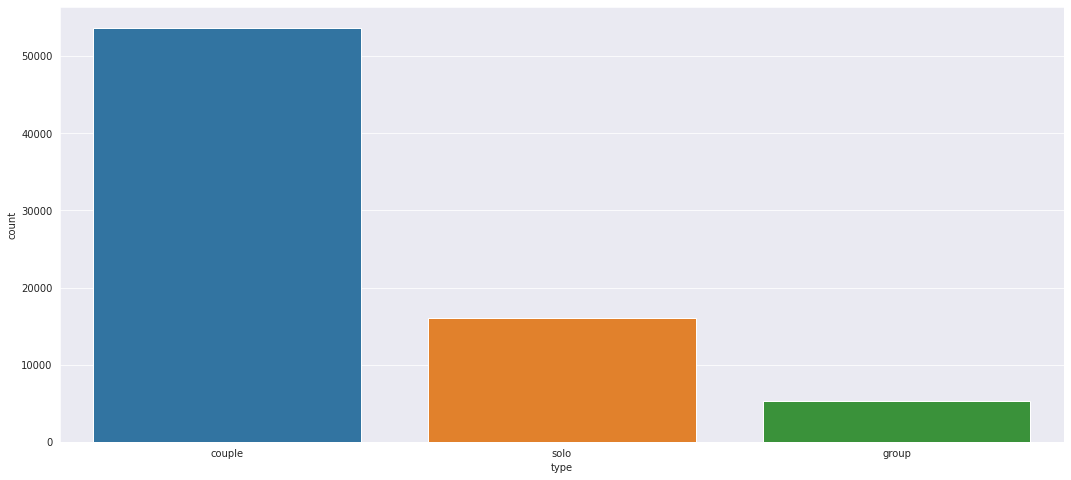

In [132]:
x=grouped_by_adults_df['type']
y=grouped_by_adults_df['count']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# We can comment that couples are the most frequent visitors, in fact the no of couple are almost three times solo travellers .. followed by group which are the least frequent ones..

In [133]:
df_not_cancelled['adults'].unique()

array([2, 1, 3, 4, 0])

In [134]:
df['adults'].unique()

array([ 2,  1,  3,  4, 40, 26, 50, 27, 55,  0, 20,  6,  5, 10])

# So, we have found one interesting co-incidence that all bookings for visitors more than 4 are cancelled...

# How long do people stay?

In [135]:
visitors_stays_df = pd.DataFrame()
visitors_stays_df[['week_nights','weekend_nights','hotel']]=df_not_cancelled[['stays_in_week_nights','stays_in_weekend_nights','hotel']]
visitors_stays_df['total_nights'] = visitors_stays_df['week_nights'] + visitors_stays_df['weekend_nights']

In [136]:
grouped_by_stays_df=visitors_stays_df.groupby(by='total_nights')['hotel'].count().reset_index().rename(columns={'hotel':'count'}).sort_values(by='count',ascending=False)

In [137]:
grouped_by_stays_df

,total_nights,count
1,1,15749
3,3,15725
2,2,15480
4,4,11025
7,7,5686
5,5,5121
6,6,2322
10,10,783
8,8,720
0,0,680


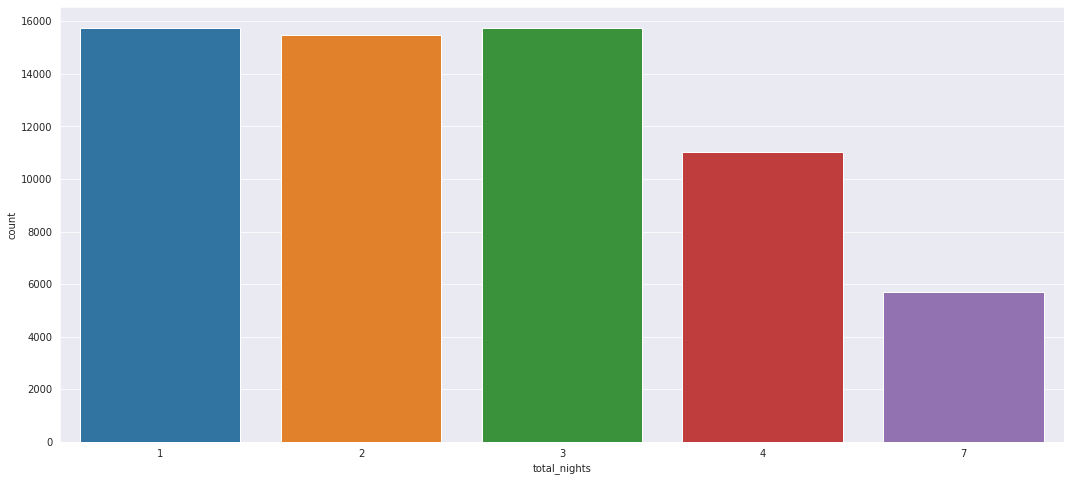

In [138]:
#There are lots of outliers here, so lets take only top 5
df_top_stays = grouped_by_stays_df.head()
x=df_top_stays['total_nights']
y=df_top_stays['count']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

#So, majority of visitors stay for upto 3 days

# Lets check how many cars parking spaces are required by visiters

In [139]:
grouped_parking_df = df_not_cancelled.groupby(by='required_car_parking_spaces')['hotel'].count().reset_index()
grouped_parking_df.rename(columns={'hotel':'count'},inplace=True)
grouped_parking_df

,required_car_parking_spaces,count
0,0,67750
1,1,7383
2,2,28
3,3,3
4,8,2


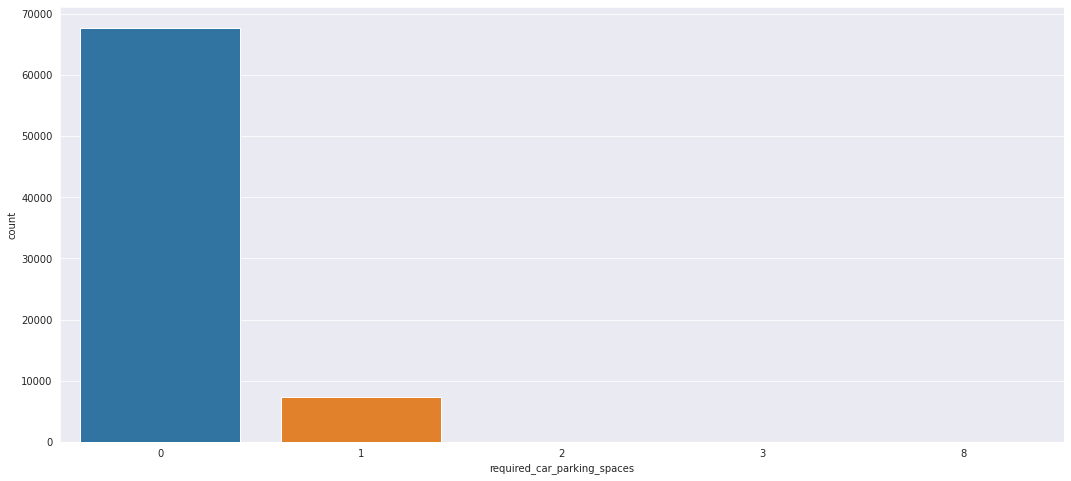

In [140]:
x=grouped_parking_df['required_car_parking_spaces']
y=grouped_parking_df['count']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# So there are very rare visitors who require more than 1 car parking spaces.

# Lets check the majority type of visitors
# We have four types here : Transient, Contract,Transient-Party,Group

In [141]:
# Grouping visitors by their type
grouped_by_type_df = df_not_cancelled.groupby(by='customer_type')['hotel'].count().reset_index()
grouped_by_type_df.rename(columns={'hotel':'count'},inplace=True)
grouped_by_type_df

,customer_type,count
0,Contract,2814
1,Group,518
2,Transient,53099
3,Transient-Party,18735


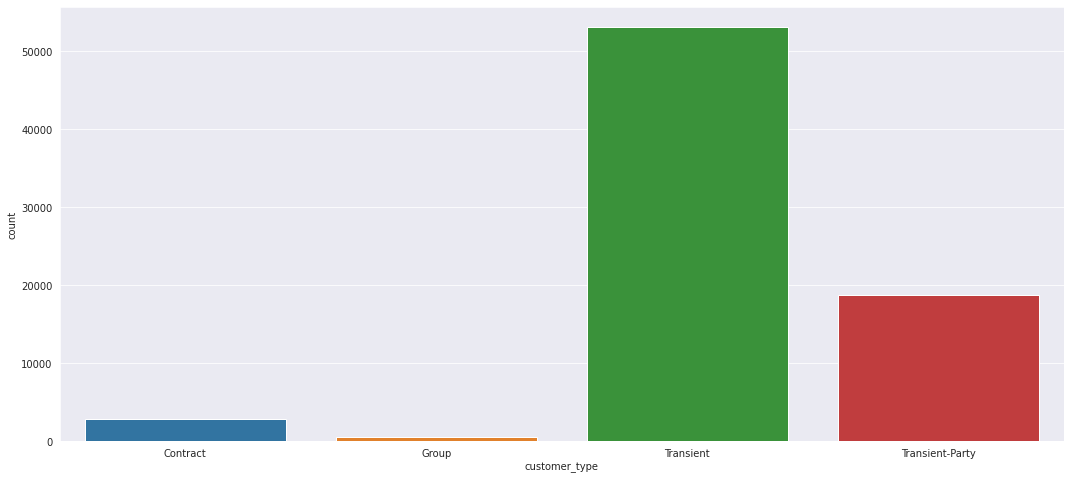

In [142]:
x=grouped_by_type_df['customer_type']
y=grouped_by_type_df['count']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# So, majority of visitors are **Transient** Type.

# Lets check what type of meal do visitors prefer

In [143]:
grouped_by_meal_df = df_not_cancelled.groupby(by='meal')['hotel'].count().reset_index()
grouped_by_meal_df.rename(columns={'hotel':'count'},inplace=True)
grouped_by_meal_df

,meal,count
0,BB,57800
1,FB,320
2,HB,9479
3,SC,6684
4,Undefined,883


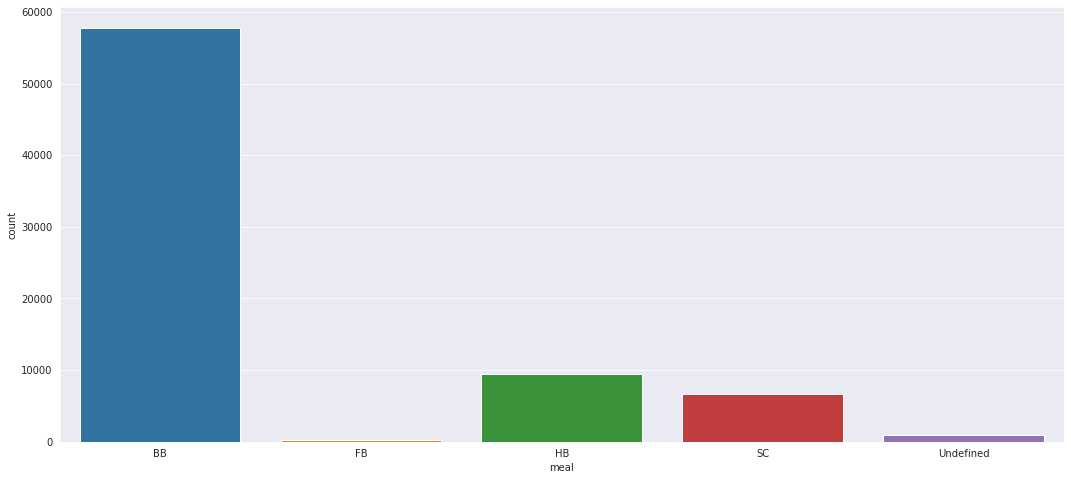

In [144]:
x=grouped_by_meal_df['meal']
y=grouped_by_meal_df['count']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# So, most of the visitors prefer breakfast only...

# Lets find which market segment brings in more visitors

In [145]:
grouped_by_market_df = df_not_cancelled.groupby(by='market_segment')['hotel'].count().reset_index()
grouped_by_market_df['perc_bookings']= grouped_by_market_df['hotel']*100/grouped_by_market_df['hotel'].sum()
grouped_by_market_df

,market_segment,hotel,perc_bookings
0,Aviation,185,0.246122
1,Complementary,646,0.859431
2,Corporate,4303,5.724663
3,Direct,10672,14.197909
4,Groups,7714,10.262619
5,Offline TA/TO,15908,21.163824
6,Online TA,35738,47.545433


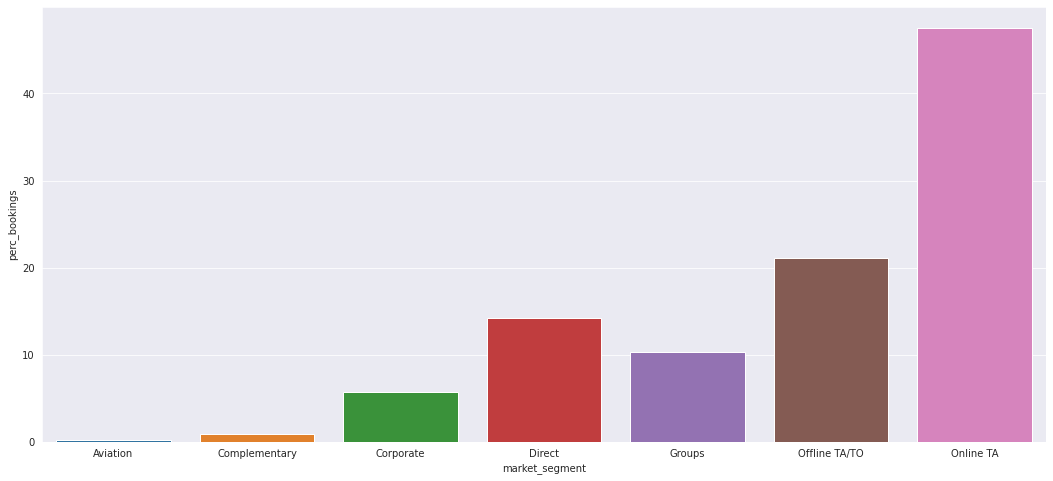

In [146]:
x=grouped_by_market_df['market_segment']
y=grouped_by_market_df['perc_bookings']
plt.figure(figsize=(18,8))
sns.set_style("darkgrid")
sns.barplot(x=x,y=y)
plt.show()

# So, we can conclude that almost half of the visitors come from bookings by online travel agencies..

# Lets check relation between cancellation and market segment

In [147]:
# We have one cancellation df, we will remove non require column and add the required ones
cancellation_df=pd.DataFrame()
cancellation_df['status']= hotel_cancellation_df['status']
cancellation_df

,status
0,not cancelled
1,cancelled


In [148]:
market_segment_list=list(df['market_segment'].unique())

In [149]:
for segment in market_segment_list:
  if segment != 'Undefined':
    cancellation_df[segment]=[df[df['market_segment']==segment][df['is_canceled']==0].shape[0] ,df[df['market_segment']==segment][df['is_canceled']==1].shape[0]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


In [150]:
cancellation_df

,status,Direct,Corporate,Online TA,Offline TA/TO,Complementary,Groups,Aviation
0,not cancelled,10672,4303,35738,15908,646,7714,185
1,cancelled,1934,992,20739,8311,97,12097,52


In [151]:
new_cancellation_df= cancellation_df.T
new_cancellation_df.rename(columns={0:'not_cancelled',1:'cancelled'},inplace=True)
new_cancellation_df.drop(index='status',inplace=True)
new_cancellation_df['perc_cancellation']=100*new_cancellation_df['cancelled']/(new_cancellation_df['not_cancelled'] + new_cancellation_df['cancelled'])
new_cancellation_df

,not_cancelled,cancelled,perc_cancellation
Direct,10672,1934,15.341901
Corporate,4303,992,18.734655
Online TA,35738,20739,36.721143
Offline TA/TO,15908,8311,34.316033
Complementary,646,97,13.055182
Groups,7714,12097,61.062036
Aviation,185,52,21.940928


In [152]:
new_cancellation_df.index

Index(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO', 'Complementary',
       'Groups', 'Aviation'],
      dtype='object')

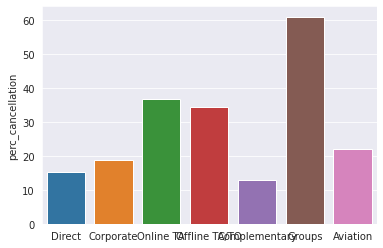

In [153]:
x= new_cancellation_df.index
y=new_cancellation_df['perc_cancellation']
sns.barplot(x=x,y=y)

# So here can say that Groups bookings are most-frequently cancelled ..more than 60% while the complementary and direct bookings are rarely cancelled.. only 13% and 15% respectively..

# Lets check if the room type provided by hotel is same as the reserved type and if that affects the cancellation.

In [154]:
# We will create a new column that would store boolean data , True if the room provided is same as the one reserved..
df['correct_room_type']= df['assigned_room_type'] == df['reserved_room_type']

In [155]:
# Lets convert the boolean value to integer
df['correct_room_type'] = df['correct_room_type'].astype('int')

In [156]:
# adding a column for total guests and droppping entries for zero visitors
df['total_guests'] = df['adults'] + df['children'] + df['babies']
df = df[df['total_guests']>0]

In [157]:
# Removing unwanted columns
df1 = df.copy()
df1.drop(columns=['hotel','arrival_date_year','arrival_date_month','arrival_date_week_number','arrival_date_day_of_month','stays_in_weekend_nights','stays_in_week_nights','adults','children','babies','meal','country','market_segment','distribution_channel','reserved_room_type','assigned_room_type','deposit_type','customer_type','reservation_status','reservation_status_date'],inplace=True)

In [158]:
df1.head()

,is_canceled,lead_time,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,correct_room_type,total_guests
0,0,342,0,0,0,3,0,0.0,0,0,1,2
1,0,737,0,0,0,4,0,0.0,0,0,1,2
2,0,7,0,0,0,0,0,75.0,0,0,0,1
3,0,13,0,0,0,0,0,75.0,0,0,1,1
4,0,14,0,0,0,0,0,98.0,0,1,1,2


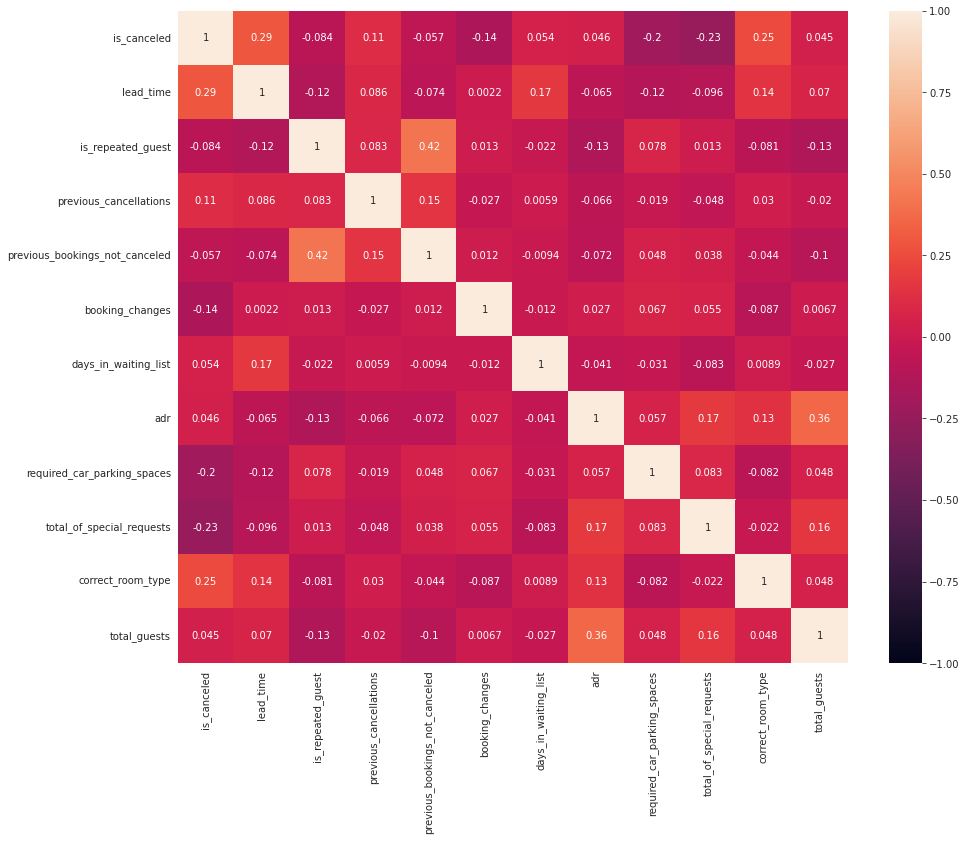

In [159]:
# Checking co-relation with all the features.
fig , ax = plt.subplots(figsize = (15,12))
sns.heatmap(df1.corr(),annot=True,ax=ax,vmin=-1.0)

# Summary

###**Summary**



> We had data of more than 1 lakh hotel bookings by people from various regions, having two types of hotel. Follwing are the **takeaway** points that would be handy to ameliorate hospatily services as well as beneficial to a user beforehand booking.

* The peak season is Mar-June (summer) and the off-season is winter (Dec-Jan).
* Apart from this there is spike in visitors in Oct month.
* The hotel rates are highest around August month and lowest in winters.
* Bookings are fewer at year-ending & start of year, and the rates are also the lowest in the period.
* Hotel recieved high no of special requests from visitors in August month.
* Groups bookings are most-frequently cancelled while direct and complimentary bookings are rarely cancelled.
* Online travel agencies bring in most bookings.
* Most of the visitors prefer breakfast only as their meal-inclusive option
* Majority of visitors stay for upto 3 days
* There are very rarely any visitors who require more than 1 car parking spaces.
* Most frequent bookings are done by couples.
* Maximum bookings are from Portugal , United Kingdom and France
* Bookings are increasing with time and 2016 has seen noticeable increase in bookings which is relatively less in 2017 .
* City hotels are booked almost twice the no of times that Resort hotels are booked
*  City hotels are cancelled more often than Resort hotels
























